# DIABETES DETECTION MODEL

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#using diabetes.csv dataset, the dataset used is obtained from online sources
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
#Describing the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
#infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


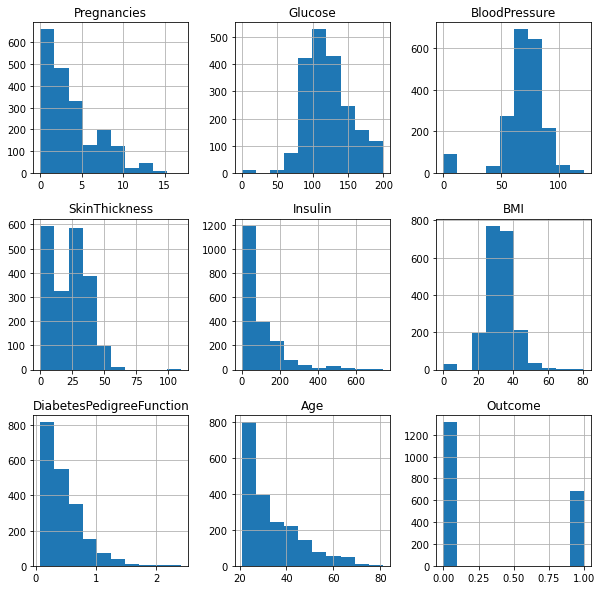

In [7]:
#histogram created for dataset
df.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot:>

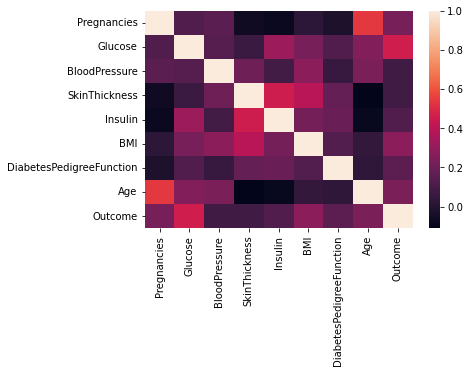

In [8]:
#correlation

sns.heatmap(df.corr())

#We can analyze skin thickness,insulin,pregnencies and age are full independent to each other
#Here age and pregencies has negative correlation

<AxesSubplot:xlabel='count', ylabel='Outcome'>

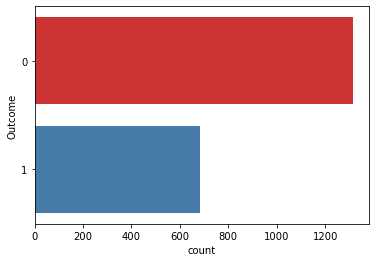

In [9]:
#We count total outcomes in each target 0 1
#0 means no diabeted
#1 means patient with diabtes

sns.countplot(y=df['Outcome'],palette='Set1')

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

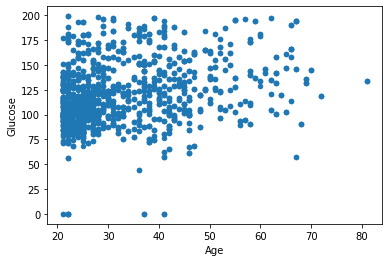

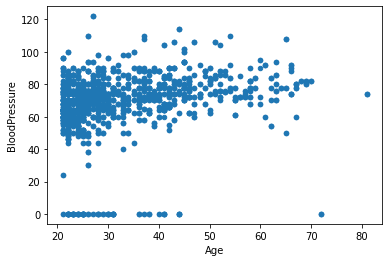

In [10]:
#scatter plot to understand

df.plot(kind='scatter',x='Age',y='Glucose')
df.plot(kind='scatter',x='Age',y='BloodPressure')

In [11]:
#Extracting feature

X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)       #train=80% and test=20%

In [13]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((1600, 8), (400, 8), (1600,), (400,))

In [14]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1547,4,99,72,17,0,25.6,0.294,28
376,0,98,82,15,84,25.2,0.299,22
810,1,130,70,13,105,25.9,0.472,22
1801,0,134,58,20,291,26.4,0.352,21
697,0,99,0,0,0,25.0,0.253,22


In [15]:
test_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
96,2,92,62,28,0,31.6,0.130,24
438,1,97,70,15,0,18.2,0.147,21
466,0,74,52,10,36,27.8,0.269,22
1491,1,80,74,11,60,30.0,0.527,22
1841,0,181,88,44,510,43.3,0.222,26


In [16]:
train_y.head()

1547    0
376     0
810     0
1801    0
697     0
Name: Outcome, dtype: int64

In [17]:
test_y.head()

96      0
438     0
466     0
1491    0
1841    1
Name: Outcome, dtype: int64

# Lets build the model

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

acc = []
roc = []

model = LogisticRegression(solver='liblinear')
model.fit(train_X, train_y)
prediction = model.predict(test_X)


#find the accuracy
ac = metrics.accuracy_score(test_y,prediction)
acc.append(ac)
print('The accuracy of Logistic Regression is: ', ac)


#find the ROC_AOC curve
rc=metrics.roc_auc_score(test_y,prediction)
roc.append(rc)
print('The ROC_AOC curve is: ', rc)

#displaying predicted values
pd.DataFrame(data={'Actual':test_y,'Predicted':prediction}).head()

The accuracy of Logistic Regression is:  0.7675
The ROC_AOC curve is:  0.7166666666666666


,Actual,Predicted
96,0,0
438,0,0
466,0,0
1491,0,0
1841,1,1


## Support Vector Machine

In [19]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

#find accuracy
ac = metrics.accuracy_score(test_y,y_pred)
acc.append(ac)
print("The Accuracy of SVM is :",ac)

#find the ROC_AOC curve
rc = metrics.roc_auc_score(test_y,y_pred)
roc.append(rc)
print("The ROC_AOC curve is :",rc)

#displaying predicted values
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

The Accuracy of SVM is : 0.785
The ROC_AOC curve is : 0.74


,Actual,Predicted
96,0,0
438,0,0
466,0,0
1491,0,0
1841,1,1


## Random Forest

In [20]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

#find accuracy
ac = metrics.accuracy_score(test_y,y_pred)
acc.append(ac)
print("The Accuracy of Random Forest is :",ac)

#find the ROC_AOC curve
rc = metrics.roc_auc_score(test_y,y_pred)
roc.append(rc)
print("The ROC_AOC curve is :",rc)

#displaying predicted values
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

The Accuracy of Random Forest is : 0.975
The ROC_AOC curve is : 0.972


,Actual,Predicted
96,0,0
438,0,0
466,0,0
1491,0,0
1841,1,1


##  K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)
#n_neighbors value can be changed to get higher accuracy, but might contain higher error

#find accuracy
ac = metrics.accuracy_score(test_y,y_pred)
acc.append(ac)
print("The Accuracy of KNN is :",ac)

#find the ROC_AOC curve
rc = metrics.roc_auc_score(test_y,y_pred)
roc.append(rc)
print("The ROC_AOC curve is :",rc)

#displaying predicted values
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

The Accuracy of KNN is : 0.795
The ROC_AOC curve is : 0.7626666666666667


,Actual,Predicted
96,0,0
438,0,0
466,0,0
1491,0,0
1841,1,0


##  Naive Bayes Theorem

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

#find accuracy
ac = metrics.accuracy_score(test_y,y_pred)
acc.append(ac)
print("The Accuracy of Naive Bayes is :",ac)

#find the ROC_AOC curve
rc = metrics.roc_auc_score(test_y,y_pred)
roc.append(rc)
print("The ROC_AOC curve is :",rc)

#displaying predicted values
pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

## Plotting the bar graph

ValueError: shape mismatch: objects cannot be broadcast to a single shape

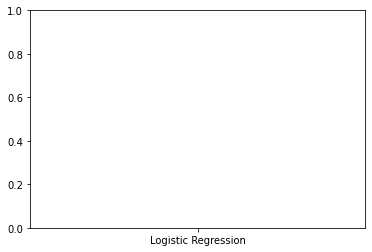

In [22]:
plt.bar(['Logistic Regression','SVM','Random Forest','KNN','Naive Bayes'],acc,color=['salmon','brown','red','yellow','orange'],label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')
plt.show()

plt.bar(['Logistic Regression','SVM','Random Forest','KNN','Naive Bayes'],roc,color=['salmon','brown','red','yellow','orange'],label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()


#Random forest has highest accuracy 95%+- and ROC_AUC curve 95%+-
#model can be improve more if we take same count of labels
#in our model 30% is diabetic and 70% non diabetic patient as mentioned in the begining non diabetics are more than diabetics

# Thank You :) 